In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd


In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

cocacola_df = pd.read_excel(r'C:\Users\Owner\OneDrive\Desktop\data science assingment\19\CocaCola_Sales_Rawdata.xlsx')
print(cocacola_df.dtypes)

cocacola_df['Sales'] = pd.to_numeric(cocacola_df['Sales'], errors='coerce')

cocacola_df = cocacola_df.dropna()

print(cocacola_df.dtypes)

train_size = int(len(cocacola_df) * 0.8)
train, test = cocacola_df[:train_size], cocacola_df[train_size:]

model = ARIMA(train['Sales'], order=(5, 1, 2))  
fit_model = model.fit()

forecast_values = fit_model.forecast(steps=len(test))

print(forecast_values)


Quarter     object
Sales      float64
dtype: object
Quarter     object
Sales      float64
dtype: object
33    4105.040246
34    3756.118220
35    3535.197304
36    3588.571137
37    4244.416093
38    3843.667230
39    3669.567347
40    3782.081163
41    4340.640528
Name: predicted_mean, dtype: float64


D:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


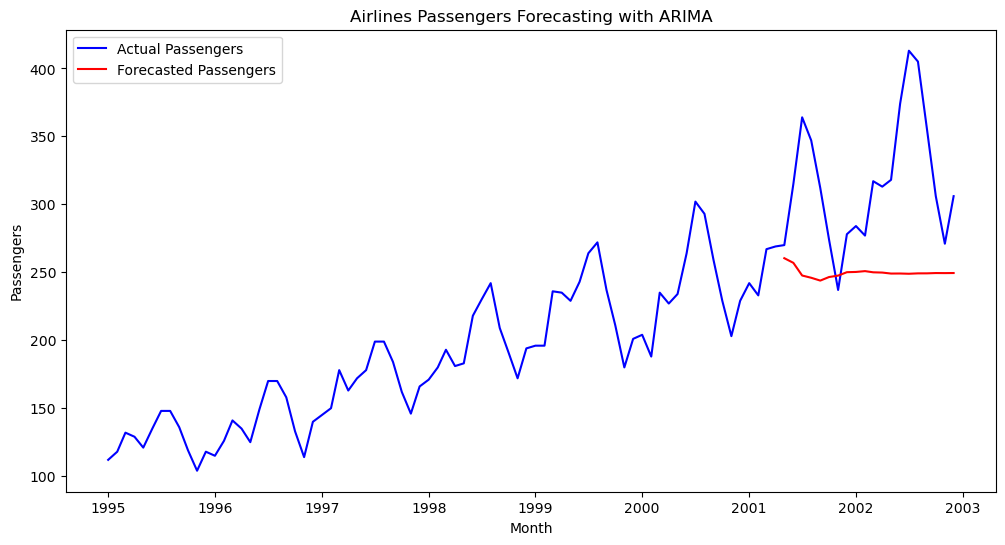

RMSE for Airlines Passengers Forecasting: 81.67920973707895


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

airlines_df = pd.read_excel(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\19\Airlines+Data.xlsx")

airlines_df['Month'] = pd.to_datetime(airlines_df['Month'])
airlines_df.set_index('Month', inplace=True)

train_size = int(len(airlines_df) * 0.8)
train, test = airlines_df[:train_size], airlines_df[train_size:]

model = ARIMA(train, order=(5, 1, 2)) 
fit_model = model.fit()

forecast = fit_model.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test, forecast))

plt.figure(figsize=(12, 6))
plt.plot(airlines_df.index, airlines_df['Passengers'], label='Actual Passengers', color='blue')
plt.plot(test.index, forecast, label='Forecasted Passengers', color='red')
plt.title('Airlines Passengers Forecasting with ARIMA')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

print(f"RMSE for Airlines Passengers Forecasting: {rmse}")
